# Image processing

## Imports

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## Ex 1

(512, 512, 3)


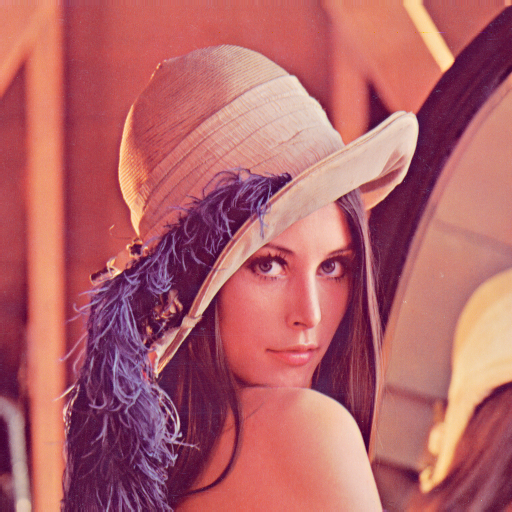

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]]


In [4]:
# Ex 1
I = cv2.imread('lena.png')
print (I.shape)
cv2_imshow(I)

print (I[0:1][0:1])

(137, 137, 3)


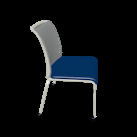

In [7]:
# Ex 1
I = cv2.imread('chair.png')
print (I.shape)
cv2_imshow(I)

(137, 137, 4)


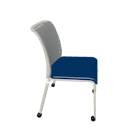

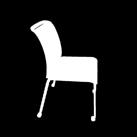

0

In [19]:
# Ex 1
I = cv2.imread('chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])
I[0,0,3]

## Ex 2

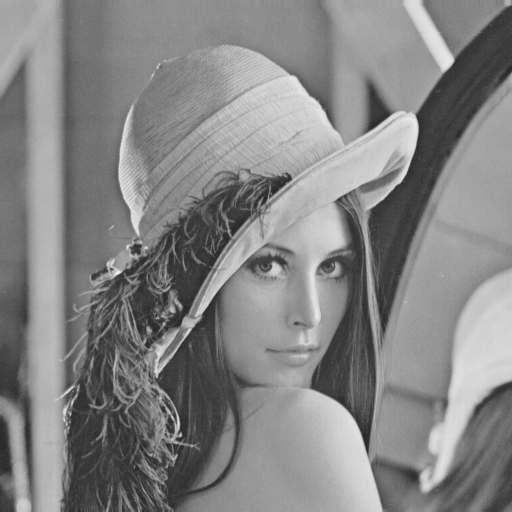

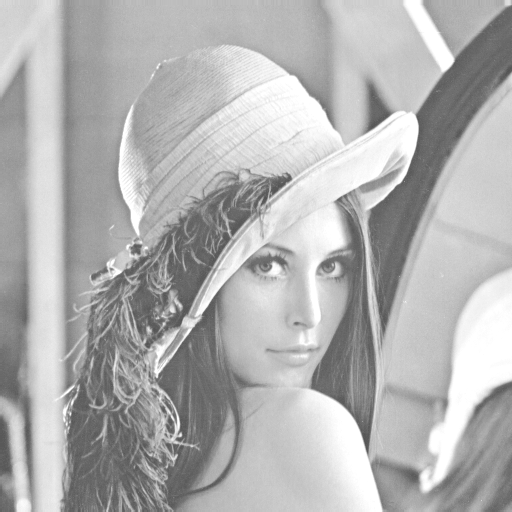

In [74]:
I = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
shift = 45

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j]+shift <= 255:
      I[i,j] += shift
    else:
      I[i,j] = 255

cv2_imshow(I)

## Ex 3

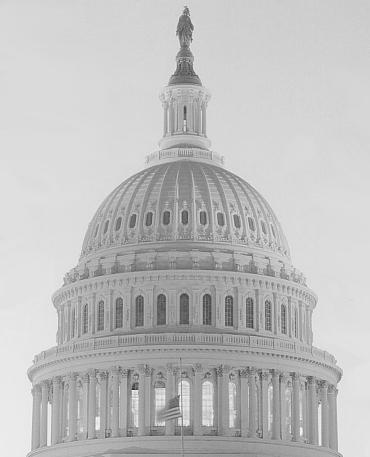

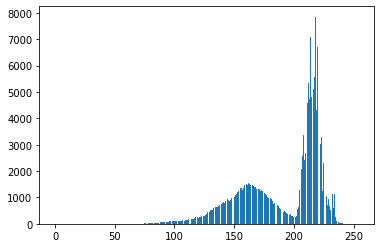

In [76]:
# Ex 3
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

I = cv2.imread('gamma1.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

hist = [0 for i in range(255)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    hist[I[i,j]] += 1

points = [i for i in range(255)]
plt.bar(points, hist)
plt.show()

## Ex 4

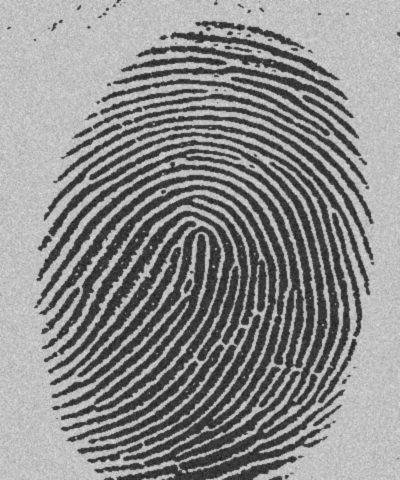

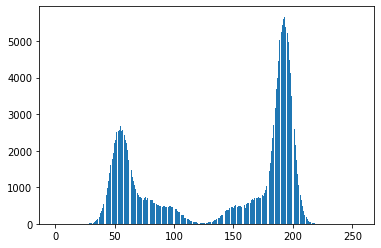

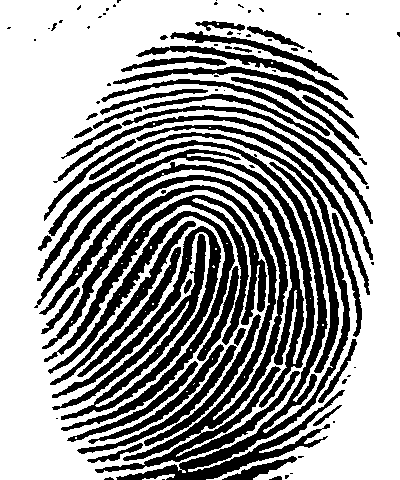

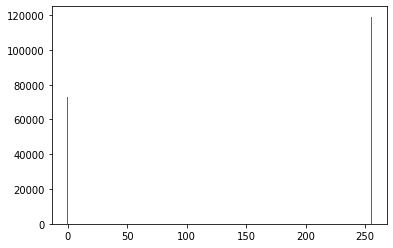

In [77]:
# Ex 4
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

I = cv2.imread('FingerPrint.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(I)

hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    hist[I[i,j]] += 1

points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()

# choosing 125 as threshold based on histogram
hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] < 125:
      I[i,j] = 0
      hist[0] += 1
    else:
      I[i,j] = 255
      hist[255] += 1
cv2_imshow(I)
points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()

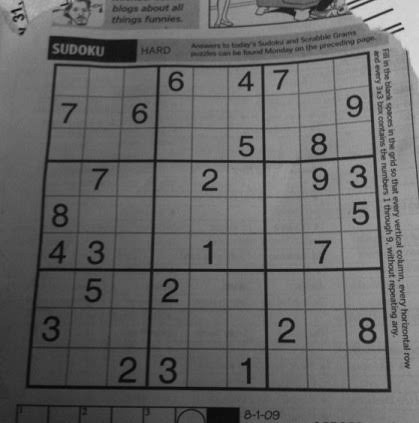

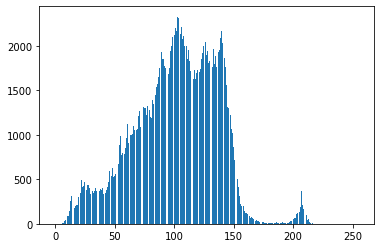

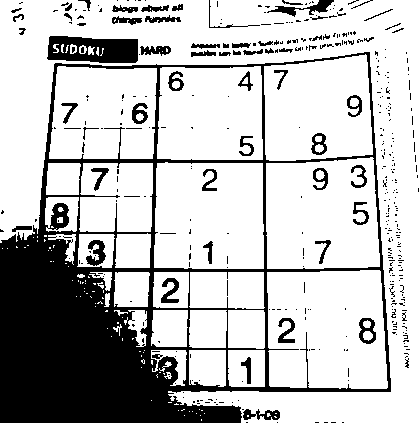

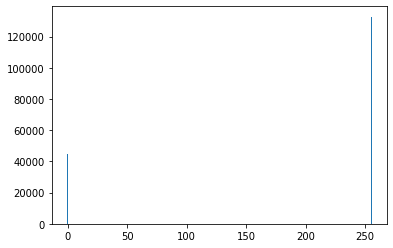

In [78]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

I = cv2.imread('sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    hist[I[i,j]] += 1

points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()

hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] < 80:
      I[i,j] = 0
      hist[0] += 1
    else:
      I[i,j] = 255
      hist[255] += 1
cv2_imshow(I)
points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()

## Ex 5

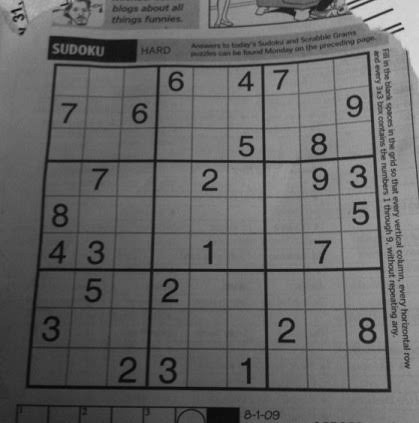

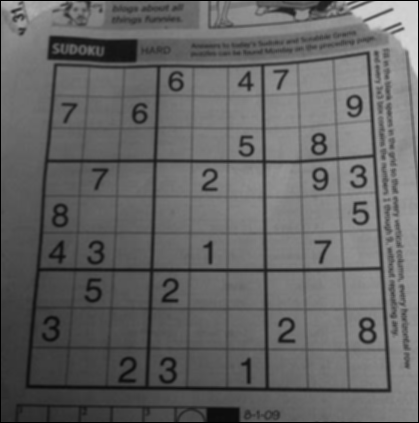

In [79]:
I = cv2.imread('sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

Inew = np.zeros((I.shape[0], I.shape[1]))
conv = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]])

for i in range(1, I.shape[0]-1):
  for j in range(1, I.shape[1]-1):
    for a in range(3):
      for b in range(3):
        Inew[i,j] += I[i-1+a,j-1+b] * conv[a,b]

cv2_imshow(Inew)

## Ex 6 / Q4

In [81]:
# Ex 6
# Counting windows, edge detection, sobel filter
I = cv2.imread('window.jpeg', cv2.IMREAD_GRAYSCALE)
# cv2_imshow(I)

# Horizontal sobel
Inew = np.zeros((I.shape[0], I.shape[1]))
conv = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
for i in range(1, I.shape[0]-1):
  for j in range(1, I.shape[1]-1):
    for a in range(3):
      for b in range(3):
        Inew[i,j] += I[i-1+a,j-1+b] * conv[a,b]
# cv2_imshow(Inew)

# Count horizontal edges
flag = 0
edgesh = 0
threshw = -20000
threshb = -threshw
count = 0
for i in range(1, I.shape[0]-1):
  for j in range(1, I.shape[1]-1):
    count += Inew[i,j]
  if count < threshw and flag == 0:
    edgesh += 1
    flag = 1
  if count > threshb and flag == 1:
    flag = 0
  count = 0
print('Horizontal edges = ', edgesh)

# Verticle sobel
Inew = np.zeros((I.shape[0], I.shape[1]))
conv = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
for i in range(1, I.shape[0]-1):
  for j in range(1, I.shape[1]-1):
    for a in range(3):
      for b in range(3):
        Inew[i,j] += I[i-1+a,j-1+b] * conv[a,b]
# cv2_imshow(Inew)

# Count verticle edges
flag = 0
edgesv = 0
threshw = -20000
threshb = -threshw
count = 0
for j in range(1, I.shape[1]-1):
  for i in range(1, I.shape[0]-1):
    count += Inew[i,j]
  if count < threshw and flag == 0:
    edgesv += 1
    flag = 1
  if count > threshb and flag == 1:
    flag = 0
  count = 0
print('Verticle edges = ', edgesv)

print('Number of windows =', (edgesh+1) * (edgesv+1))


Horizontal edges =  13
Verticle edges =  9
Number of windows = 140


## Q1

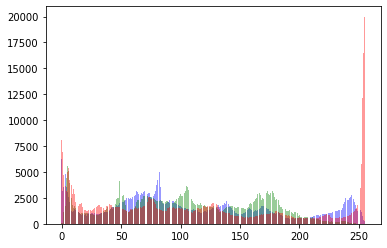

In [94]:

I = cv2.imread('lotus.jpg')
# cv2_imshow(I)

histb = [0 for i in range(256)]
histg = [0 for i in range(256)]
histr = [0 for i in range(256)]

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    histb[I[i,j,0]] += 1
    histg[I[i,j,1]] += 1
    histr[I[i,j,2]] += 1

points = [i for i in range(256)]
plt.bar(points, histb, color='b', alpha=0.4)
plt.bar(points, histg, color='g', alpha=0.4)
plt.bar(points, histr, color='r', alpha=0.4)
plt.show()

## Q2

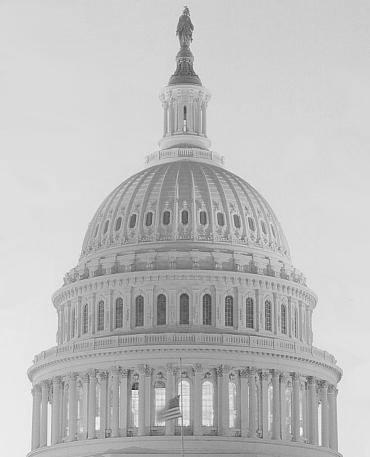

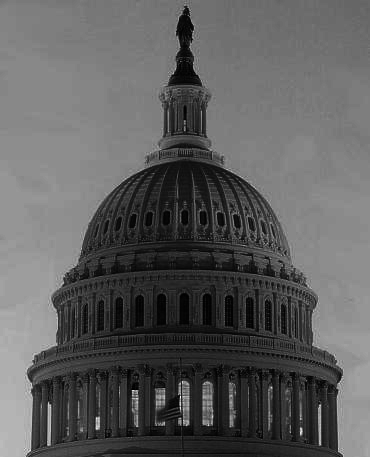

In [101]:
I = cv2.imread('gamma1.jpg')
cv2_imshow(I)
gamma = 4

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    I[i,j] = ((I[i,j]/255)**gamma)*255

cv2_imshow(I)

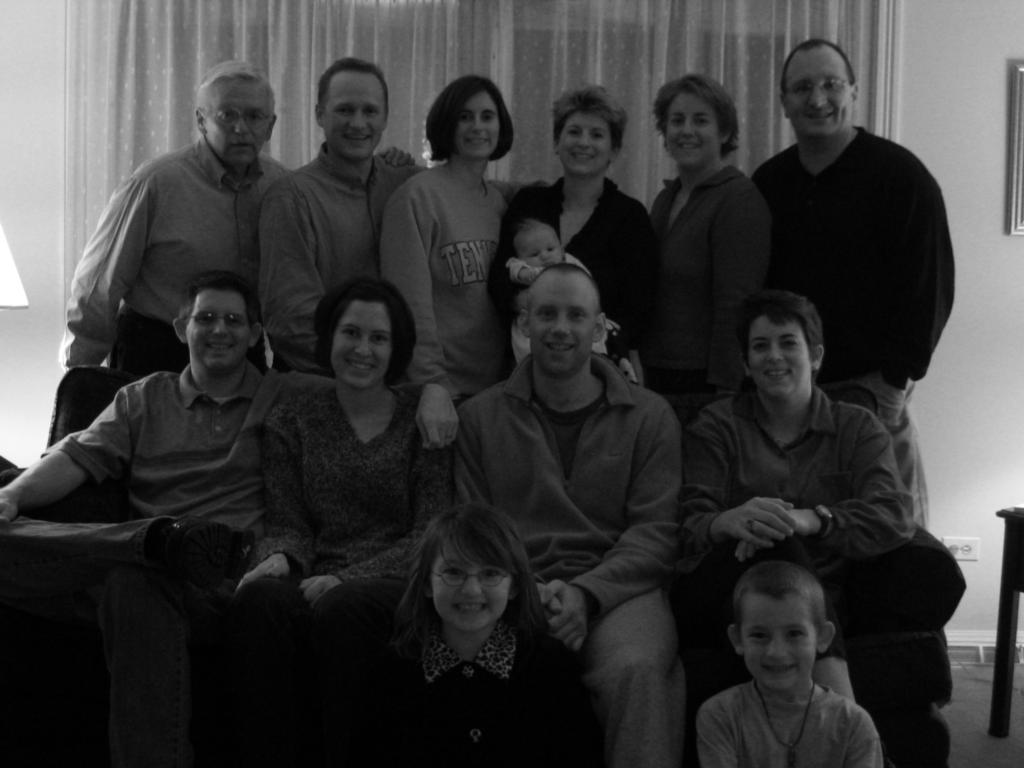

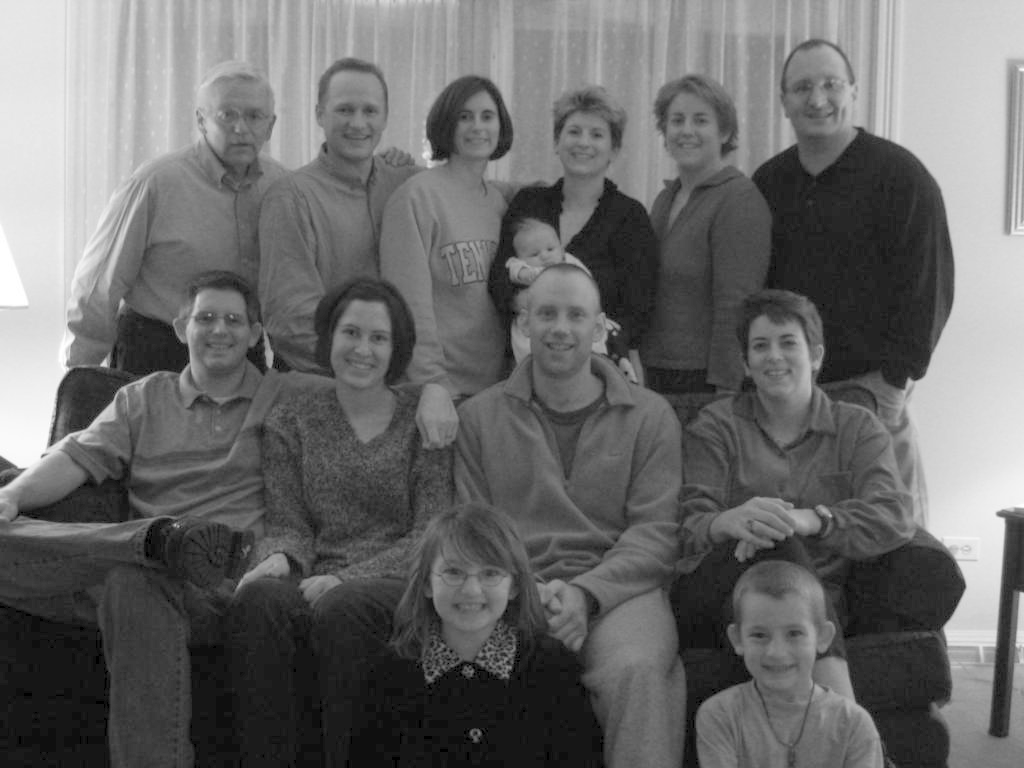

In [105]:
I = cv2.imread('gamma2.jpg')
cv2_imshow(I)
gamma = 0.5

for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    I[i,j] = ((I[i,j]/255)**gamma)*255

cv2_imshow(I)

## Q3

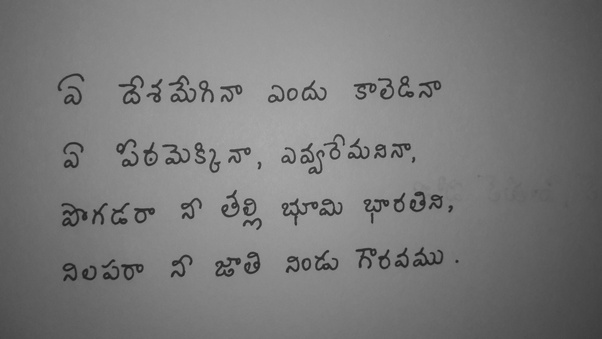

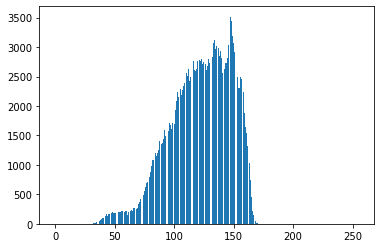

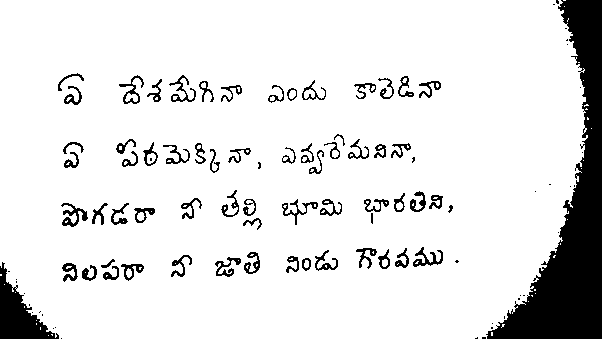

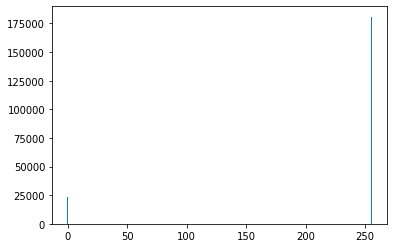

In [109]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

I = cv2.imread('text.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    hist[I[i,j]] += 1

points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()

threshold = 90
hist = [0 for i in range(256)]
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] < threshold:
      I[i,j] = 0
      hist[0] += 1
    else:
      I[i,j] = 255
      hist[255] += 1
cv2_imshow(I)
points = [i for i in range(256)]
plt.bar(points, hist)
plt.show()